In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
HR = '../../Institute of Data/MP2New/HR_comma_sep.csv'
hr = pd.read_csv(HR)

In [3]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
hr.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


## WARNING!! Messy EDA

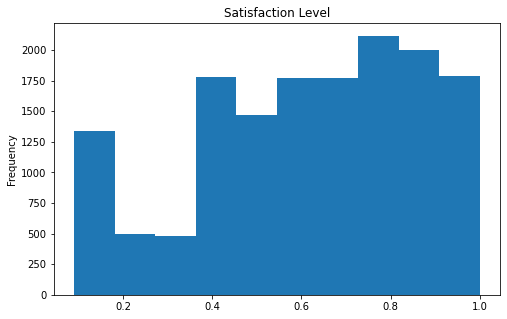

In [6]:
plt.figure(figsize=(8, 5))
hr['satisfaction_level'].plot(kind = 'hist')
plt.title('Satisfaction Level')
plt.show()

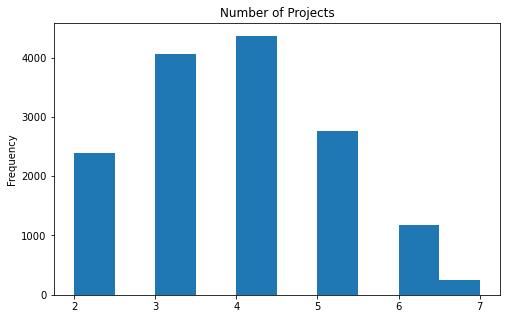

In [7]:
plt.figure(figsize=(8, 5))
hr['number_project'].plot(kind = 'hist')
plt.title('Number of Projects')
plt.show()

In [8]:
hr['salary'].value_counts(normalize = True)

low       0.487766
medium    0.429762
high      0.082472
Name: salary, dtype: float64

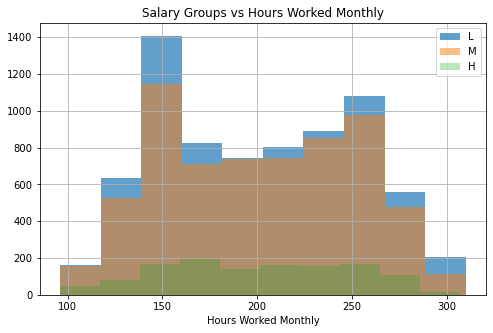

In [9]:
plt.figure(figsize=(8, 5))
hr[hr['salary'] == 'low']['average_montly_hours'].hist(alpha = 0.7)
hr[hr['salary'] == 'medium']['average_montly_hours'].hist(alpha = 0.5)
hr[hr['salary'] == 'high']['average_montly_hours'].hist(alpha = 0.3)
plt.legend(['L', 'M', 'H'])
plt.xlabel('Hours Worked Monthly')
plt.title('Salary Groups vs Hours Worked Monthly')
plt.show()

In [10]:
hr['left'].value_counts(normalize = True)

0    0.761917
1    0.238083
Name: left, dtype: float64

In [11]:
HrsVsSalary= pd.crosstab( hr['average_montly_hours'], hr['salary'])
HrsVsSalary

salary,high,low,medium
average_montly_hours,,,
96,1,3,2
97,2,7,5
98,0,15,8
99,2,5,4
100,0,8,11
...,...,...,...
306,1,13,4
307,1,12,1
308,0,7,13


<Figure size 576x360 with 0 Axes>

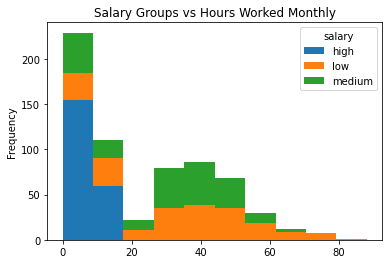

In [12]:
plt.figure(figsize=(8, 5))
HrsVsSalary.plot(kind = 'hist', stacked = True)
plt.title('Salary Groups vs Hours Worked Monthly')
plt.show()

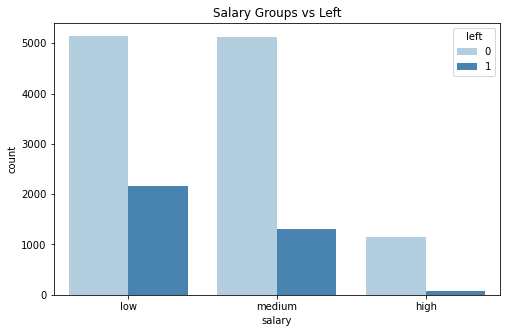

In [13]:
plt.figure(figsize=(8, 5))
sns.countplot(x="salary", hue="left", data = hr, palette= 'Blues')
plt.title('Salary Groups vs Left')
plt.show()

In [14]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [15]:
hr.sales.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [16]:
departmentVSquitting = pd.crosstab(hr['sales'], hr['left'])
departmentVSquitting

left,0,1
sales,,
IT,954,273
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
support,1674,555


<Figure size 576x360 with 0 Axes>

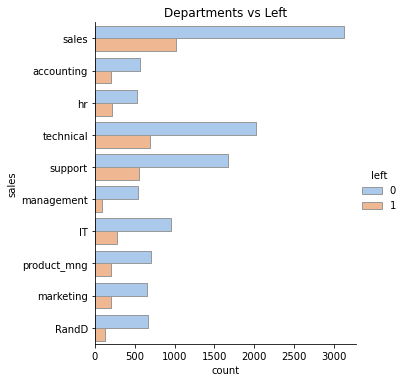

In [17]:
plt.figure(figsize=(8, 5))
sns.catplot(y="sales", hue="left", kind="count",
            palette="pastel", edgecolor=".6",
            data= hr)
plt.title('Departments vs Left')
plt.show()

In [18]:
hr['sales'].value_counts(normalize = True)

sales          0.276018
technical      0.181345
support        0.148610
IT             0.081805
product_mng    0.060137
marketing      0.057204
RandD          0.052470
accounting     0.051137
hr             0.049270
management     0.042003
Name: sales, dtype: float64

In [19]:
hr['left'].value_counts(normalize = True)

0    0.761917
1    0.238083
Name: left, dtype: float64

## Feature selection with Random Forest - without categorical columns

                       importance
satisfaction_level       0.363948
number_project           0.195201
time_spend_company       0.184620
average_montly_hours     0.137940
last_evaluation          0.109678
Work_accident            0.008000
promotion_last_5years    0.000612


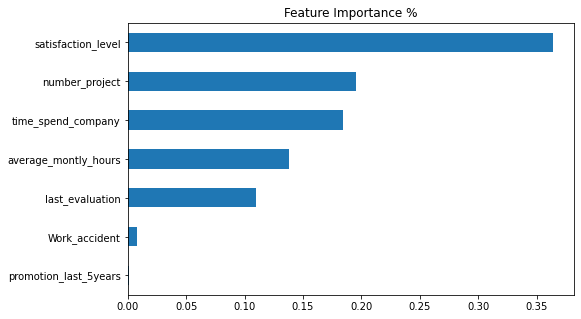

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = hr.drop(['left', 'sales', 'salary'], axis = 1)
y = hr.left

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

rfc = RandomForestClassifier(n_estimators=200, max_depth=6, n_jobs=-1, random_state=50)
model = rfc.fit(X_train, y_train)

feature_importances_df = pd.DataFrame(model.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance',ascending=False)
print(feature_importances_df)
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values()
plt.figure(figsize=(8, 5))
feat_importances.plot(kind='barh')
plt.title('Feature Importance %')
plt.show()

## Monthly work hours vs Satisfaction Level

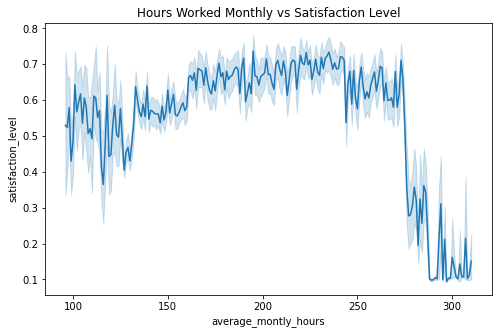

In [21]:
plt.figure(figsize=(8, 5))
sns.lineplot(x="average_montly_hours", y="satisfaction_level", data= hr)
plt.title('Hours Worked Monthly vs Satisfaction Level')
plt.show()

<Figure size 576x360 with 0 Axes>

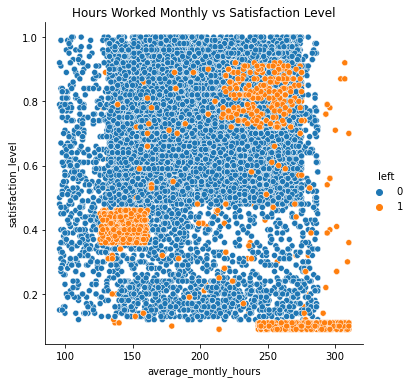

In [22]:
plt.figure(figsize=(8, 5))
sns.relplot(x = 'average_montly_hours', y = 'satisfaction_level', hue = 'left', data = hr)
plt.title('Hours Worked Monthly vs Satisfaction Level')
plt.show()

## Number of projects vs Satisfaction Level

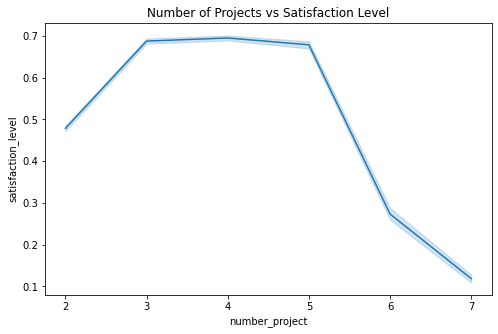

In [23]:
plt.figure(figsize=(8, 5))
sns.lineplot(x = 'number_project', y = 'satisfaction_level', data = hr)
plt.title('Number of Projects vs Satisfaction Level')
plt.show()

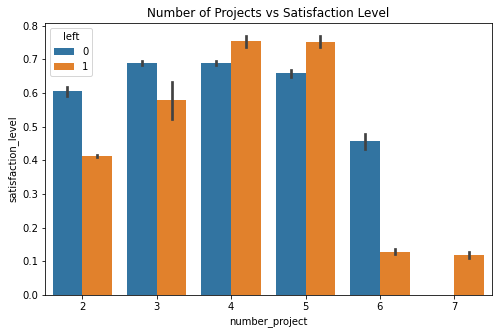

In [24]:
plt.figure(figsize=(8, 5))
sns.barplot(x = 'number_project', y = 'satisfaction_level', hue = 'left', data = hr)
plt.title('Number of Projects vs Satisfaction Level')
plt.show()

## Time spent in the company vs Satisfaction Level

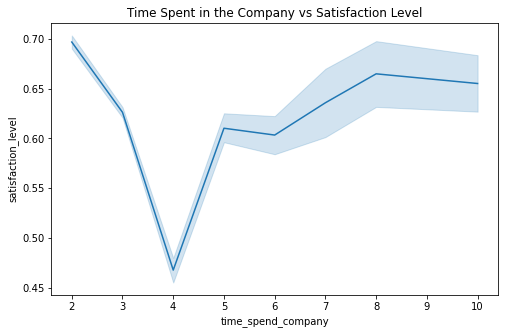

In [25]:
plt.figure(figsize=(8, 5))
sns.lineplot(x = 'time_spend_company', y = 'satisfaction_level', data = hr)
plt.title('Time Spent in the Company vs Satisfaction Level')
plt.show()

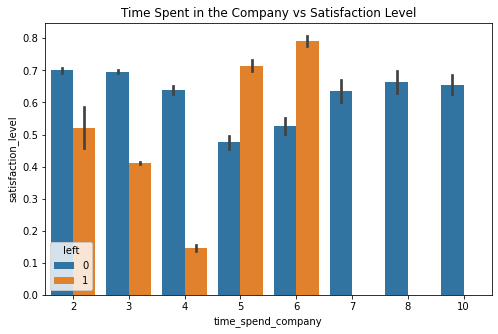

In [26]:
plt.figure(figsize=(8, 5))
sns.barplot(data= hr, x="time_spend_company", y="satisfaction_level", hue="left")
plt.title('Time Spent in the Company vs Satisfaction Level')
plt.show()

## Salary vs Satisfaction Level

<Figure size 576x360 with 0 Axes>

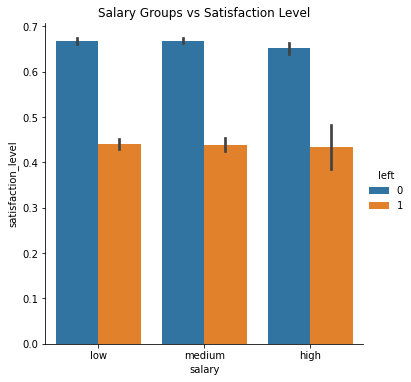

In [27]:
plt.figure(figsize=(8, 5))
sns.catplot(x="salary", y="satisfaction_level", kind = 'bar', hue = 'left', data= hr)
plt.title('Salary Groups vs Satisfaction Level')
plt.show()

## Departments vs Satisfaction Level

In [28]:
hr['sales'].value_counts(normalize = True)

sales          0.276018
technical      0.181345
support        0.148610
IT             0.081805
product_mng    0.060137
marketing      0.057204
RandD          0.052470
accounting     0.051137
hr             0.049270
management     0.042003
Name: sales, dtype: float64

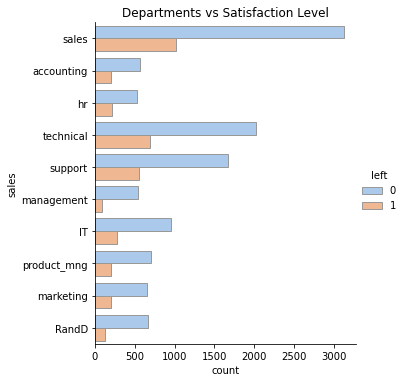

In [29]:
sns.catplot(y="sales", hue="left", kind="count", palette="pastel", edgecolor=".6", data= hr)
plt.title('Departments vs Satisfaction Level')
plt.show()

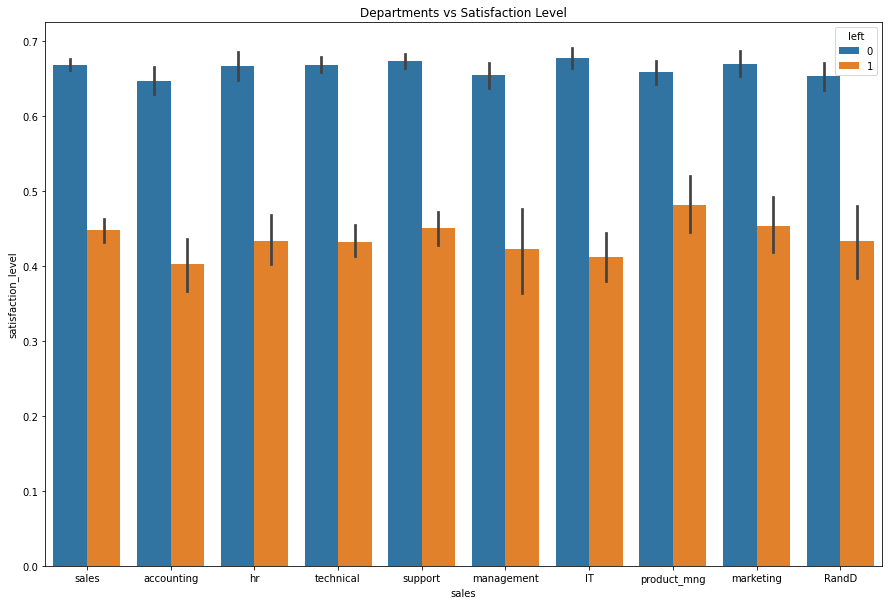

In [30]:
plt.figure(figsize=(15, 10))
sns.barplot(x="sales", y="satisfaction_level", hue = 'left', data= hr)
plt.title('Departments vs Satisfaction Level')
plt.show()

## Correlation heatmap

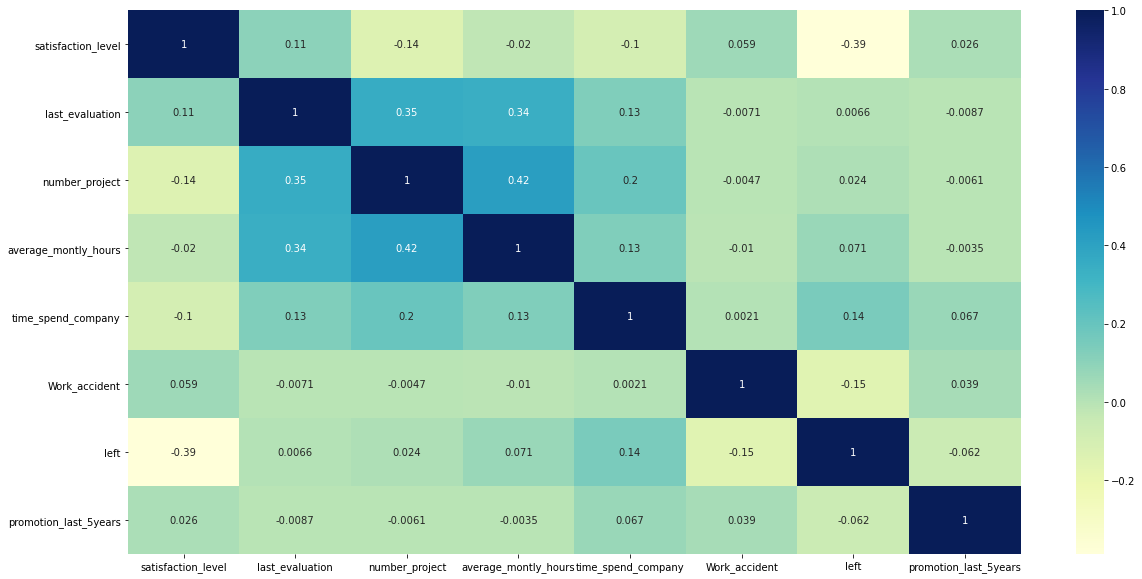

In [31]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(hr.corr(), cmap='YlGnBu', annot = True, ax=ax)
plt.show()

## Get dummies

In [32]:
hr = pd.get_dummies(data = hr, columns = ['sales', 'salary'], prefix = ['dep', 'salary_'])
hr.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dep_IT,dep_RandD,...,dep_hr,dep_management,dep_marketing,dep_product_mng,dep_sales,dep_support,dep_technical,salary__high,salary__low,salary__medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


## Checking target value balance

In [33]:
hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'dep_IT', 'dep_RandD', 'dep_accounting',
       'dep_hr', 'dep_management', 'dep_marketing', 'dep_product_mng',
       'dep_sales', 'dep_support', 'dep_technical', 'salary__high',
       'salary__low', 'salary__medium'],
      dtype='object')

In [68]:
X = hr[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dep_IT', 'dep_RandD', 'dep_accounting',
       'dep_hr', 'dep_management', 'dep_marketing', 'dep_product_mng',
       'dep_sales', 'dep_support', 'dep_technical', 'salary__high',
       'salary__low', 'salary__medium']]
y = hr['left']

In [69]:
y.value_counts()

0    11428
1     3571
Name: left, dtype: int64

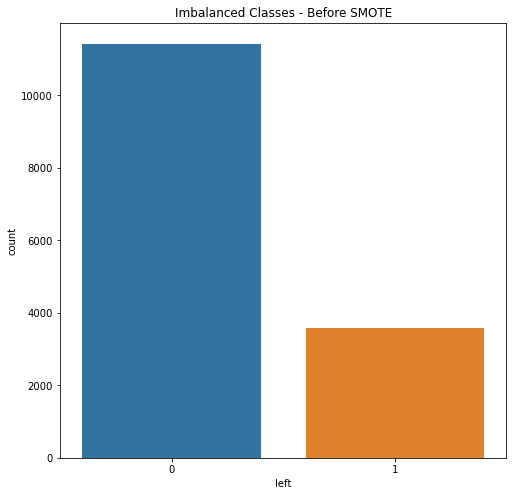

In [70]:
plt.figure(figsize=(8, 8))
sns.countplot(x = 'left', data= hr)
plt.title('Imbalanced Classes - Before SMOTE')
plt.show()

## SMOTE

In [71]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority', random_state=7)

oversampled_trainX, oversampled_trainY = sm.fit_resample(X, y)
oversampled_df = pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)], axis=1)
oversampled_df.columns

Index(['left', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dep_IT', 'dep_RandD', 'dep_accounting',
       'dep_hr', 'dep_management', 'dep_marketing', 'dep_product_mng',
       'dep_sales', 'dep_support', 'dep_technical', 'salary__high',
       'salary__low', 'salary__medium'],
      dtype='object')

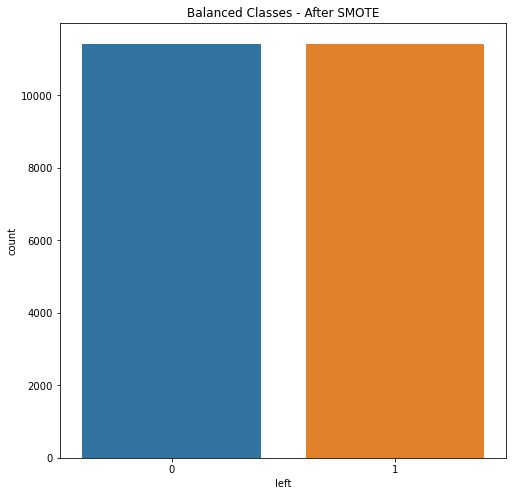

In [72]:
plt.figure(figsize=(8, 8))
sns.countplot(x = 'left', data=oversampled_df)
plt.title('Balanced Classes - After SMOTE')
plt.show()

In [73]:
oversampled_df.head()

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dep_IT,dep_RandD,...,dep_hr,dep_management,dep_marketing,dep_product_mng,dep_sales,dep_support,dep_technical,salary__high,salary__low,salary__medium
0,1,0.38,0.53,2,157,3,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,1,0.80,0.86,5,262,6,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0.11,0.88,7,272,4,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,1,0.72,0.87,5,223,5,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,1,0.37,0.52,2,159,3,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [74]:
oversampled_df.var()

left                        0.250011
satisfaction_level          0.070376
last_evaluation             0.032383
number_project              2.066163
average_montly_hours     2938.664979
time_spend_company          1.710571
Work_accident               0.090088
promotion_last_5years       0.014358
dep_IT                      0.064767
dep_RandD                   0.037989
dep_accounting              0.043354
dep_hr                      0.043871
dep_management              0.029608
dep_marketing               0.046524
dep_product_mng             0.049317
dep_sales                   0.197988
dep_support                 0.119843
dep_technical               0.145748
salary__high                0.054381
salary__low                 0.249354
salary__medium              0.239672
dtype: float64

In [76]:
X_scaled = oversampled_df[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dep_IT', 'dep_RandD', 'dep_accounting',
       'dep_hr', 'dep_management', 'dep_marketing', 'dep_product_mng',
       'dep_sales', 'dep_support', 'dep_technical', 'salary__high',
       'salary__low', 'salary__medium']]
y = oversampled_df['left']

In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_scaled)

In [78]:
y.value_counts()

1    11428
0    11428
Name: left, dtype: int64

## Splitting data before Voting Classifier

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

## Checking accuracy scores for multiple classifiers

In [80]:
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
logreg2 = LogisticRegression(C=1, max_iter=5000, solver='liblinear', penalty = 'l1')

from sklearn.naive_bayes import GaussianNB
gnb2 = GaussianNB()

from sklearn.svm import SVC
svm2 = SVC(kernel='linear', probability=True)

from sklearn.neighbors import KNeighborsClassifier
knn2 = KNeighborsClassifier(n_neighbors = 2)

import xgboost as xgb
xg_cl = xgb.XGBClassifier(objective = 'binary:logistic', n_estimators = 10, seed = 42, use_label_encoder = False, eval_metric = 'logloss')

from sklearn.ensemble import RandomForestClassifier
rfc2 = RandomForestClassifier(n_estimators=200, max_depth=6, n_jobs=-1, random_state=50)

from sklearn.tree import DecisionTreeClassifier
dt2 = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=3, min_samples_leaf=5)

In [81]:
from sklearn.ensemble import VotingClassifier

classifiers = [('LogisticRegression' , logreg2),('GaussianNB' , gnb2), ('DecisionTreeClassifier', dt2), ('XGBoost', xg_cl), ('RandomForestClassifier', rfc2), ('KNeighborsClassifier', knn2)]
#, ('SVM', svm2)
#Iterate over the defined list of tuples containing classifiers
for clf_name, clf in classifiers:
    #fit clf to the training set
    clf.fit(X_train, y_train)
    #predict the labels of the test set
    y_pred = clf.predict(X_test)
    #evaluate the accuracy of clf on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy_score(y_test, y_pred)))

LogisticRegression : 0.804
GaussianNB : 0.652
DecisionTreeClassifier : 0.924
XGBoost : 0.966
RandomForestClassifier : 0.953
KNeighborsClassifier : 0.970


## Logreg

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [83]:
from sklearn.model_selection import GridSearchCV
lr_params = {'penalty': ['l1','l2'], 'C': [1, 10, 100]}
grid_log = GridSearchCV(LogisticRegression(solver = 'liblinear', max_iter = 5000), lr_params, cv=5, verbose=1, n_jobs=-1)
grid_log.fit(X_scaled, y)
print('Logreg best estimator:', grid_log.best_estimator_)
print('Logreg best parameters:', grid_log.best_params_)
print('Logreg best score:', grid_log.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Logreg best estimator: LogisticRegression(C=1, max_iter=5000, solver='liblinear')
Logreg best parameters: {'C': 1, 'penalty': 'l2'}
Logreg best score: 0.7902978532737007


In [84]:
logreg2.fit(X_train, y_train)
logreg2_train_score = logreg2.score(X_train, y_train)
logreg2_test_score = logreg2.score(X_test, y_test)
print('Logreg2 train score: ', logreg2_train_score)
print('Logreg2 test score: ', logreg2_test_score)

Logreg2 train score:  0.8026513419969961
Logreg2 test score:  0.804454461089752


In [85]:
y_pred_log2 = logreg2.predict(X_test)

In [86]:
logreg2_as = accuracy_score(y_test, y_pred_log2)
print('Logreg2 accuracy score : ', logreg2_as)

Logreg2 accuracy score :  0.804454461089752


In [87]:
confusion_matrix_log2 = metrics.confusion_matrix(y_test, y_pred_log2)
confusion_df = pd.DataFrame(confusion_matrix_log2, index=['is_Working', 'is_Left'], columns=['predicted_Working','predicted_Left'])


print(confusion_df, '\n')
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

            predicted_Working  predicted_Left
is_Working               3020             793
is_Left                   682            3048 

[['TN' 'FP']
 ['FN' 'TP']]


In [88]:
print(classification_report(y_test, y_pred_log2, zero_division = 0))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80      3813
           1       0.79      0.82      0.81      3730

    accuracy                           0.80      7543
   macro avg       0.80      0.80      0.80      7543
weighted avg       0.80      0.80      0.80      7543



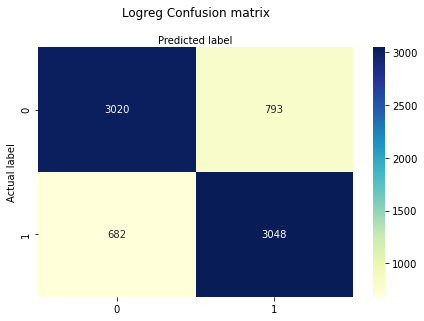

In [103]:
class_names=['Not Left','Left'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix_log2), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Logreg Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## Random Forest

In [90]:
from sklearn.ensemble import RandomForestClassifier
rfc2 = RandomForestClassifier(n_estimators=200, max_depth=6, n_jobs=-1, random_state=50)
rfc2.fit(X_train, y_train)
rfc2_train_score = rfc2.score(X_train, y_train)
rfc2_test_score = rfc2.score(X_test, y_test)
y_pred_rfc2 = rfc2.predict(X_test)
rfc_as2 = accuracy_score(y_test, y_pred_rfc2)
print('RFC2 train score: ', rfc2_train_score)
print('RFC2 test score: ', rfc2_test_score)
print('RFC2 accuracy score: ',rfc_as2)

RFC2 train score:  0.9558545027101156
RFC2 test score:  0.9528039241681029
RFC2 accuracy score:  0.9528039241681029


In [91]:
confusion_matrix_rfc2 = metrics.confusion_matrix(y_test, y_pred_rfc2)
confusion_df = pd.DataFrame(confusion_matrix_rfc2, index=['is_Working', 'is_Left'], columns=['predicted_Working','predicted_Left'])


print(confusion_df, '\n')
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

            predicted_Working  predicted_Left
is_Working               3727              86
is_Left                   270            3460 

[['TN' 'FP']
 ['FN' 'TP']]


In [92]:
print(classification_report(y_test, y_pred_rfc2, zero_division = 0))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      3813
           1       0.98      0.93      0.95      3730

    accuracy                           0.95      7543
   macro avg       0.95      0.95      0.95      7543
weighted avg       0.95      0.95      0.95      7543



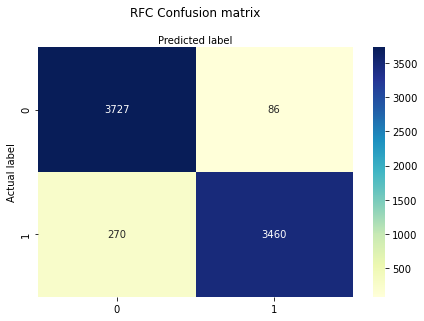

In [104]:
class_names=['Not Left','Left'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix_rfc2), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('RFC Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## Decision Tree

In [94]:
from sklearn.tree import DecisionTreeClassifier
dt2 = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=3, min_samples_leaf=5)
dt2.fit(X_train, y_train)
dt2_train_score = dt2.score(X_train, y_train)
dt2_test_score = dt2.score(X_test, y_test)
y_pred_dt2 = dt2.predict(X_test)
dt2_as2 = accuracy_score(y_test, y_pred_dt2)
print('DT2 train score: ', dt2_train_score)
print('DT2 test score: ', dt2_test_score)
print('DT2 accuracy score: ',dt2_as2)

DT2 train score:  0.9230718996930712
DT2 test score:  0.9243006761235583
DT2 accuracy score:  0.9243006761235583


In [95]:
confusion_matrix_dt2 = metrics.confusion_matrix(y_test, y_pred_dt2)
confusion_df = pd.DataFrame(confusion_matrix_dt2, index=['is_Working', 'is_Left'], columns=['predicted_Working','predicted_Left'])

print(confusion_df, '\n')
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

            predicted_Working  predicted_Left
is_Working               3441             372
is_Left                   199            3531 

[['TN' 'FP']
 ['FN' 'TP']]


In [96]:
print(classification_report(y_test, y_pred_dt2, zero_division = 0))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92      3813
           1       0.90      0.95      0.93      3730

    accuracy                           0.92      7543
   macro avg       0.93      0.92      0.92      7543
weighted avg       0.93      0.92      0.92      7543



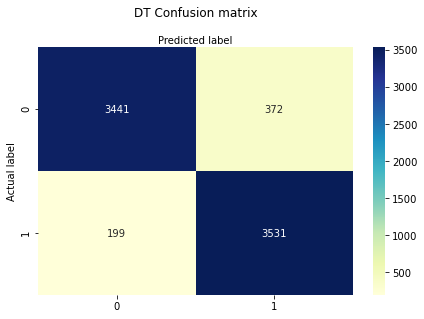

In [105]:
class_names=['Not Left','Left'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix_dt2), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('DT Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## KNN

In [98]:
from sklearn.neighbors import KNeighborsClassifier

knn2 = KNeighborsClassifier(n_neighbors = 2)
knn2.fit(X_train, y_train)
knn2_train_score = knn2.score(X_train, y_train)
knn2_test_score = knn2.score(X_test, y_test)
y_pred_knn2 = knn2.predict(X_test)
knn_as2 = accuracy_score(y_test, y_pred_knn2)
print('KNN2 train score: ', knn2_train_score)
print('KNN2 test score: ', knn2_test_score)
print('KNN2 accuracy score: ', knn_as2)

KNN2 train score:  0.99242473715144
KNN2 test score:  0.9701710194882672
KNN2 accuracy score:  0.9701710194882672


In [99]:
confusion_matrix_knn2 = metrics.confusion_matrix(y_test, y_pred_knn2)
confusion_df = pd.DataFrame(confusion_matrix_knn2, index=['is_Working', 'is_Left'], columns=['predicted_Working','predicted_Left'])

print(confusion_df, '\n')
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

            predicted_Working  predicted_Left
is_Working               3701             112
is_Left                   113            3617 

[['TN' 'FP']
 ['FN' 'TP']]


In [100]:
print(classification_report(y_test, y_pred_knn2, zero_division = 0))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3813
           1       0.97      0.97      0.97      3730

    accuracy                           0.97      7543
   macro avg       0.97      0.97      0.97      7543
weighted avg       0.97      0.97      0.97      7543



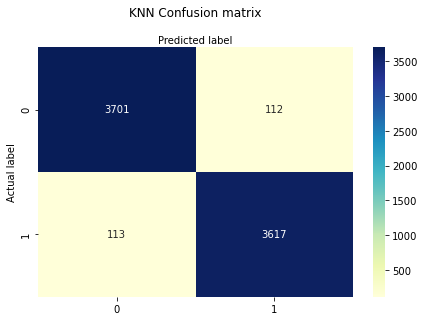

In [106]:
class_names=['Not Left','Left'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix_knn2), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('KNN Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## Precision recall curve

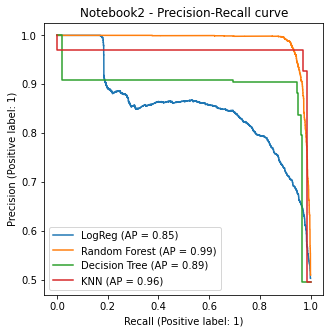

In [108]:
from sklearn.metrics import precision_recall_curve
#from sklearn.metrics import plot_precision_recall_curve not used anymore
import matplotlib.pyplot as plt
from sklearn.metrics import PrecisionRecallDisplay

plt.figure(figsize=(5, 5))
PrecisionRecallDisplay.from_estimator(logreg2, X_test, y_test, ax = plt.gca(),name = "LogReg")

PrecisionRecallDisplay.from_estimator(rfc2, X_test, y_test, ax = plt.gca(),name = "Random Forest")

PrecisionRecallDisplay.from_estimator(dt2, X_test, y_test, ax = plt.gca(),name = "Decision Tree")

PrecisionRecallDisplay.from_estimator(knn2, X_test, y_test, ax = plt.gca(),name = "KNN")

plt.title('Notebook2 - Precision-Recall curve')
plt.show()



#plot_precision_recall_curve
#display = PrecisionRecallDisplay.from_estimator(classifier, X_test, y_test, name="LinearSVC"

## precision is a measure of result relevancy, while recall is a measure of how many truly relevant results are returned.